In [226]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [9]:
#read colchester data from csv
colchester_df = pd.read_csv("data/colchester.csv",parse_dates=['datetime'])
colchester_df.head()

/var/folders/h9/ht4zpp_x2ld51gml9v3_lbnw0000gn/T/ipykernel_1774/1299395937.py:2: DtypeWarning: Columns (1,2,3,4,5,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  colchester_df = pd.read_csv("data/colchester.csv",parse_dates=['datetime'])


datetime  temp   dew humidity precip precipprob preciptype snow  \
0  2006-06-19T00:00:00  17.9  13.3    74.46    0.0        0.0        NaN  0.0   
1  2006-06-19T01:00:00  17.5  13.2    75.98    0.0        0.0        NaN  0.0   
2  2006-06-19T02:00:00  16.8  12.5    75.81    0.0        0.0        NaN  0.0   
3  2006-06-19T03:00:00  16.0  11.4    74.35    0.0        0.0        NaN  0.0   
4  2006-06-19T04:00:00  15.2   9.7    69.46    0.0        0.0        NaN  0.0   

  snowdepth windspeed winddir sealevelpressure cloudcover solarradiation  \
0       0.0      13.3   198.0           1008.9       90.0            NaN   
1       0.0      14.1   206.0           1008.9       90.0            NaN   
2       0.0      13.9   210.0           1008.0       90.0            NaN   
3       0.0      12.5   221.0           1007.9       90.0            NaN   
4       0.0      13.8   214.0           1007.9       26.6            NaN   

  solarenergy uvindex  
0         NaN     NaN  
1         NaN     NaN  
2         NaN     NaN  
3         NaN     NaN  
4         NaN     NaN

In [19]:
print("Number of colchester samples: ",colchester_df.shape[0])

Number of colchester samples:  295846


In [20]:
#EDA for brighton
print("colchester data types: ",colchester_df.dtypes)

colchester data types:  datetime            object
temp                object
dew                 object
humidity            object
precip              object
precipprob          object
preciptype          object
snow                object
snowdepth           object
windspeed           object
winddir             object
sealevelpressure    object
cloudcover          object
solarradiation      object
solarenergy         object
uvindex             object
dtype: object


In [10]:
#do the same for colchester
print("Colchester data types: ",colchester_df.dtypes)

Colchester data types:  datetime            object
temp                object
dew                 object
humidity            object
precip              object
precipprob          object
preciptype          object
snow                object
snowdepth           object
windspeed           object
winddir             object
sealevelpressure    object
cloudcover          object
solarradiation      object
solarenergy         object
uvindex             object
dtype: object


In [11]:
#bring colums that contain letters in data and show what strings are those
for column in colchester_df.columns:
    #if an element of the unique list contains any letter print it
    if column != 'datetime':
        words=[element for element in colchester_df[column].unique() if any(char.isalpha() for char in str(element))]
        print("Column: ",column,"contains: ", words)


Column:  temp contains:  [nan, 'temp']
Column:  dew contains:  [nan, 'dew']
Column:  humidity contains:  [nan, 'humidity']
Column:  precip contains:  [nan, 'precip']
Column:  precipprob contains:  [nan, 'precipprob']
Column:  preciptype contains:  [nan, 'rain', 'preciptype', 'rain,snow', 'snow']
Column:  snow contains:  [nan, 'snow']
Column:  snowdepth contains:  [nan, 'snowdepth']
Column:  windspeed contains:  [nan, 'windspeed']
Column:  winddir contains:  [nan, 'winddir']
Column:  sealevelpressure contains:  [nan, 'sealevelpressure']
Column:  cloudcover contains:  [nan, 'cloudcover']
Column:  solarradiation contains:  [nan, 'solarradiation']
Column:  solarenergy contains:  [nan, 'solarenergy', 'uvindex']
Column:  uvindex contains:  [nan, 'uvindex']


In [12]:
#print the unique rows that contains the word "temp" in the column "temp"

temp_rows = colchester_df[colchester_df['temp'].str.contains("temp", na=False)]
unique_temp_rows = temp_rows.drop_duplicates()
print(unique_temp_rows)


        datetime  temp  dew  humidity  precip  precipprob  preciptype  snow  \
960     datetime  temp  dew  humidity  precip  precipprob  preciptype  snow   
177726  datetime  temp  dew  humidity  precip  precipprob  preciptype  snow   

        snowdepth  windspeed  winddir  sealevelpressure  cloudcover  \
960     snowdepth  windspeed  winddir  sealevelpressure  cloudcover   
177726  snowdepth  windspeed  winddir  sealevelpressure  cloudcover   

        solarradiation  solarenergy  uvindex  
960     solarradiation  solarenergy  uvindex  
177726  solarradiation      uvindex      NaN  


In [13]:
#drop row from brighton_df that contains the word "temp" in the column "temp"
colchester_df = colchester_df[~colchester_df['temp'].str.contains("temp", na=False)]


In [14]:
# see rows with preciptype == 6
colchester_df[colchester_df['preciptype']== "6"]


datetime temp dew humidity precip precipprob preciptype snow snowdepth  \
3843          0    1   2        3      4          5          6    7         8   
6726          0    1   2        3      4          5          6    7         8   
9610          0    1   2        3      4          5          6    7         8   
11532         0    1   2        3      4          5          6    7         8   
13455         0    1   2        3      4          5          6    7         8   
...         ...  ...  ..      ...    ...        ...        ...  ...       ...   
291036        0    1   2        3      4          5          6    7         8   
291998        0    1   2        3      4          5          6    7         8   
292960        0    1   2        3      4          5          6    7         8   
293922        0    1   2        3      4          5          6    7         8   
294884        0    1   2        3      4          5          6    7         8   

       windspeed winddir sealevelpressure cloudcover solarradiation  \
3843           9      10               11         12             13   
6726           9      10               11         12             13   
9610           9      10               11         12             13   
11532          9      10               11         12             13   
13455          9      10               11         12             13   
...          ...     ...              ...        ...            ...   
291036         9      10               11         12             13   
291998         9      10               11         12             13   
292960         9      10               11         12             13   
293922         9      10               11         12             13   
294884         9      10               11         12             13   

       solarenergy uvindex  
3843            14      15  
6726            14      15  
9610            14      15  
11532           14      15  
13455           14      15  
...            ...     ...  
291036          14      15  
291998          14      15  
292960          14      15  
293922          14      15  
294884          14      15  

[111 rows x 16 columns]

In [15]:
#remove rows with preciptype = 6
colchester_df = colchester_df[colchester_df['preciptype'] != "6"]

In [16]:
#change datatypes of columns all columns to float except datetime they are in format "5.7",...
colchester_df = colchester_df.apply(pd.to_numeric, errors='ignore')


In [17]:
print("Colchester data types: ",colchester_df.dtypes)


Colchester data types:  datetime             object
temp                float64
dew                 float64
humidity            float64
precip              float64
precipprob          float64
preciptype           object
snow                float64
snowdepth           float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
solarradiation      float64
solarenergy         float64
uvindex             float64
dtype: object


In [18]:
print("Colchester missing values: ",colchester_df.isnull().sum())


Colchester missing values:  datetime                 0
temp                   642
dew                    681
humidity               679
precip                 930
precipprob             683
preciptype          265257
snow                  1805
snowdepth             1891
windspeed              635
winddir                669
sealevelpressure     11813
cloudcover            4966
solarradiation      144948
solarenergy         144913
uvindex             144924
dtype: int64


In [19]:
# check id there are duplicated rows
duplicated_rows = colchester_df[colchester_df.duplicated()]
print("Duplicated rows: ",duplicated_rows)

Duplicated rows:                     datetime  temp   dew  humidity  precip  precipprob  \
24034   2006-06-19T00:00:00  17.9  13.3     74.46     0.0         0.0   
24035   2006-06-19T01:00:00  17.5  13.2     75.98     0.0         0.0   
24036   2006-06-19T02:00:00  16.8  12.5     75.81     0.0         0.0   
24037   2006-06-19T03:00:00  16.0  11.4     74.35     0.0         0.0   
24038   2006-06-19T04:00:00  15.2   9.7     69.46     0.0         0.0   
...                     ...   ...   ...       ...     ...         ...   
295841  2009-07-12T19:00:00  21.4  11.0     51.47     0.0         0.0   
295842  2009-07-12T20:00:00  20.4  10.6     53.54     0.0         0.0   
295843  2009-07-12T21:00:00  18.2  10.6     61.35     0.0         0.0   
295844  2009-07-12T22:00:00  16.5  11.6     73.08     0.0         0.0   
295845  2009-07-12T23:00:00  15.1  12.3     83.21     0.0         0.0   

       preciptype  snow  snowdepth  windspeed  winddir  sealevelpressure  \
24034         NaN   0.0      

In [20]:
#remove rows with datetime = 0
colchester_df = colchester_df[colchester_df['datetime'] != "0"]
print("Number of colchester samples: ",colchester_df.shape[0])

Number of colchester samples:  295540


In [21]:
# see values of categeorical column preciptype
print("PrecipType values: ",colchester_df['preciptype'].unique())


PrecipType values:  [nan 'rain' 'rain,snow' 'snow']


In [22]:
# create dummy variables for categorical column preciptype and add them to the dataframe for the value "rain,snow" separate them into two columns(so at the end i will just have column snow and column rain)
# split the combined categories into separate categories
colchester_df['preciptype_rain'] = colchester_df['preciptype'].str.contains('rain')
colchester_df['preciptype_snow'] = colchester_df['preciptype'].str.contains('snow')
colchester_df.head()


datetime  temp   dew  humidity  precip  precipprob preciptype  \
0  2006-06-19T00:00:00  17.9  13.3     74.46     0.0         0.0        NaN   
1  2006-06-19T01:00:00  17.5  13.2     75.98     0.0         0.0        NaN   
2  2006-06-19T02:00:00  16.8  12.5     75.81     0.0         0.0        NaN   
3  2006-06-19T03:00:00  16.0  11.4     74.35     0.0         0.0        NaN   
4  2006-06-19T04:00:00  15.2   9.7     69.46     0.0         0.0        NaN   

   snow  snowdepth  windspeed  winddir  sealevelpressure  cloudcover  \
0   0.0        0.0       13.3    198.0            1008.9        90.0   
1   0.0        0.0       14.1    206.0            1008.9        90.0   
2   0.0        0.0       13.9    210.0            1008.0        90.0   
3   0.0        0.0       12.5    221.0            1007.9        90.0   
4   0.0        0.0       13.8    214.0            1007.9        26.6   

   solarradiation  solarenergy  uvindex preciptype_rain preciptype_snow  
0             NaN          NaN      NaN             NaN             NaN  
1             NaN          NaN      NaN             NaN             NaN  
2             NaN          NaN      NaN             NaN             NaN  
3             NaN          NaN      NaN             NaN             NaN  
4             NaN          NaN      NaN             NaN             NaN

In [23]:
#fillna for preciptype_rain and preciptype_snow witht the value False
colchester_df['preciptype_rain'] = colchester_df['preciptype_rain'].fillna(False)  
colchester_df['preciptype_snow'] = colchester_df['preciptype_snow'].fillna(False)
colchester_df.head()

datetime  temp   dew  humidity  precip  precipprob preciptype  \
0  2006-06-19T00:00:00  17.9  13.3     74.46     0.0         0.0        NaN   
1  2006-06-19T01:00:00  17.5  13.2     75.98     0.0         0.0        NaN   
2  2006-06-19T02:00:00  16.8  12.5     75.81     0.0         0.0        NaN   
3  2006-06-19T03:00:00  16.0  11.4     74.35     0.0         0.0        NaN   
4  2006-06-19T04:00:00  15.2   9.7     69.46     0.0         0.0        NaN   

   snow  snowdepth  windspeed  winddir  sealevelpressure  cloudcover  \
0   0.0        0.0       13.3    198.0            1008.9        90.0   
1   0.0        0.0       14.1    206.0            1008.9        90.0   
2   0.0        0.0       13.9    210.0            1008.0        90.0   
3   0.0        0.0       12.5    221.0            1007.9        90.0   
4   0.0        0.0       13.8    214.0            1007.9        26.6   

   solarradiation  solarenergy  uvindex  preciptype_rain  preciptype_snow  
0             NaN          NaN      NaN            False            False  
1             NaN          NaN      NaN            False            False  
2             NaN          NaN      NaN            False            False  
3             NaN          NaN      NaN            False            False  
4             NaN          NaN      NaN            False            False

In [24]:
# replace true and false with 1 and 0
colchester_df['preciptype_rain'] = colchester_df['preciptype_rain'].astype(int)
colchester_df['preciptype_snow'] = colchester_df['preciptype_snow'].astype(int)
#remove column preciptype
colchester_df = colchester_df.drop(columns=['preciptype'])

In [25]:
#order data by datetime and use datetime as index
colchester_df = colchester_df.sort_values(by='datetime')
colchester_df = colchester_df.set_index('datetime')
colchester_df.head()

temp  dew  humidity  precip  precipprob  snow  snowdepth  \
datetime                                                                        
2000-01-01T00:00:00   5.9  5.7     98.63     0.0         0.0   NaN        NaN   
2000-01-01T01:00:00   6.4  5.8     96.12     0.0         0.0   NaN        NaN   
2000-01-01T02:00:00   6.6  6.4     98.31     0.0         0.0   NaN        NaN   
2000-01-01T03:00:00   7.2  6.5     95.92     0.0         0.0   NaN        NaN   
2000-01-01T04:00:00   7.2  6.6     96.38     0.0         0.0   NaN        NaN   

                     windspeed  winddir  sealevelpressure  cloudcover  \
datetime                                                                
2000-01-01T00:00:00        9.4    210.0            1020.6         NaN   
2000-01-01T01:00:00       15.1    233.0            1020.4       100.0   
2000-01-01T02:00:00       13.9    238.0            1020.5       100.0   
2000-01-01T03:00:00       14.1    232.0            1020.5       100.0   
2000-01-01T04:00:00       14.3    242.0            1020.4       100.0   

                     solarradiation  solarenergy  uvindex  preciptype_rain  \
datetime                                                                     
2000-01-01T00:00:00             NaN          NaN      NaN                0   
2000-01-01T01:00:00             NaN          NaN      NaN                0   
2000-01-01T02:00:00             NaN          NaN      NaN                0   
2000-01-01T03:00:00             NaN          NaN      NaN                0   
2000-01-01T04:00:00             NaN          NaN      NaN                0   

                     preciptype_snow  
datetime                              
2000-01-01T00:00:00                0  
2000-01-01T01:00:00                0  
2000-01-01T02:00:00                0  
2000-01-01T03:00:00                0  
2000-01-01T04:00:00                0

In [110]:
# range of dates in our data
print("Data from: ",colchester_df.index.min()," to: ", colchester_df.index.max())

Data from:  2000-01-01T00:00:00  to:  2024-01-05T09:00:00


In [26]:
colchester_df.describe()

temp            dew       humidity         precip  \
count  294898.000000  294859.000000  294861.000000  294610.000000   
mean       10.523529       7.177801      81.450240       0.067259   
std         6.098824       5.010905      14.171166       0.646345   
min        -9.600000     -10.800000      22.430000       0.000000   
25%         6.100000       3.600000      73.230000       0.000000   
50%        10.400000       7.400000      85.360000       0.000000   
75%        14.900000      11.000000      92.610000       0.000000   
max        35.000000      21.500000     100.000000      84.324000   

          precipprob           snow      snowdepth      windspeed  \
count  294857.000000  293735.000000  293649.000000  294905.000000   
mean       10.198220       0.001101       0.069311      15.924488   
std        30.254467       0.045465       0.644133       7.860463   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000      10.100000   
50%         0.000000       0.000000       0.000000      14.600000   
75%         0.000000       0.000000       0.000000      20.600000   
max       100.000000       9.100000      15.230000      74.700000   

             winddir  sealevelpressure     cloudcover  solarradiation  \
count  294871.000000     283727.000000  290574.000000   150592.000000   
mean      198.491215       1013.915533      59.354209      121.766552   
std        95.579496         31.089555      31.856881      197.666381   
min         0.000000          0.000000       0.000000        0.000000   
25%       127.000000       1008.300000      34.100000        0.000000   
50%       218.000000       1015.600000      66.300000        8.600000   
75%       267.000000       1022.000000      88.300000      169.000000   
max       360.000000       1048.900000     100.000000     1054.000000   

         solarenergy        uvindex  preciptype_rain  preciptype_snow  
count  150627.000000  150616.000000    295540.000000    295540.000000  
mean        0.437700       1.198053         0.102155         0.005045  
std         0.712367       1.996388         0.302853         0.070849  
min         0.000000       0.000000         0.000000         0.000000  
25%         0.000000       0.000000         0.000000         0.000000  
50%         0.000000       0.000000         0.000000         0.000000  
75%         0.600000       2.000000         0.000000         0.000000  
max         3.800000      10.000000         1.000000         1.000000

Now we need to 

## PV system calculations

In [1]:
pip install pvlib

  Obtaining dependency information for pvlib from https://files.pythonhosted.org/packages/68/df/8db3eb46c22a1cc9f999314f88ff590a8293d3d997a56de4bedbe05dfdd2/pvlib-0.10.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 17.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pvlib
from pvlib.pvsystem import PVSystem, FixedMount
from pvlib.location import Location
from pvlib.modelchain import ModelChain
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS
from pvlib.irradiance import gti_dirint

In [6]:
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

# load some module and inverter specifications
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')

cec_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')

sandia_module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']

cec_inverter = cec_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']

In [12]:
# Now we create a Location object, a Mount object, a PVSystem object, and a ModelChain object.
location = Location(latitude=51.88921, longitude=0.90421) #colchester
system = PVSystem(surface_tilt=20, surface_azimuth=90,
                  module_parameters=sandia_module,
                  inverter_parameters=cec_inverter,
                  temperature_model_parameters=temperature_model_parameters)


mc = ModelChain(system, location)

In [13]:
print(mc)

ModelChain: 
  name: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: sandia_inverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses


In [66]:
eff_irr=colchester_df['solarradiation'].to_frame().rename(columns={'solarradiation':'effective_irradiance'}) #assuming it is effective irradiance

In [68]:
mc.run_model_from_effective_irradiance(eff_irr)

ModelChain: 
  name: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: sandia_inverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [71]:
colchester_df['solarpower']=mc.results.ac * 151567652 #based on assumptions

In [72]:
colchester_df.head()

temp  dew  humidity  precip  precipprob  snow  snowdepth  \
datetime                                                                        
2000-01-01T00:00:00   5.9  5.7     98.63     0.0         0.0   NaN        NaN   
2000-01-01T01:00:00   6.4  5.8     96.12     0.0         0.0   NaN        NaN   
2000-01-01T02:00:00   6.6  6.4     98.31     0.0         0.0   NaN        NaN   
2000-01-01T03:00:00   7.2  6.5     95.92     0.0         0.0   NaN        NaN   
2000-01-01T04:00:00   7.2  6.6     96.38     0.0         0.0   NaN        NaN   

                     windspeed  winddir  sealevelpressure  cloudcover  \
datetime                                                                
2000-01-01T00:00:00        9.4    210.0            1020.6         NaN   
2000-01-01T01:00:00       15.1    233.0            1020.4       100.0   
2000-01-01T02:00:00       13.9    238.0            1020.5       100.0   
2000-01-01T03:00:00       14.1    232.0            1020.5       100.0   
2000-01-01T04:00:00       14.3    242.0            1020.4       100.0   

                     solarradiation  solarenergy  uvindex  preciptype_rain  \
datetime                                                                     
2000-01-01T00:00:00             NaN          NaN      NaN                0   
2000-01-01T01:00:00             NaN          NaN      NaN                0   
2000-01-01T02:00:00             NaN          NaN      NaN                0   
2000-01-01T03:00:00             NaN          NaN      NaN                0   
2000-01-01T04:00:00             NaN          NaN      NaN                0   

                     preciptype_snow  solarpower  
datetime                                          
2000-01-01T00:00:00                0         NaN  
2000-01-01T01:00:00                0         NaN  
2000-01-01T02:00:00                0         NaN  
2000-01-01T03:00:00                0         NaN  
2000-01-01T04:00:00                0         NaN

In [73]:
colchester_df.describe()

temp            dew       humidity         precip  \
count  294898.000000  294859.000000  294861.000000  294610.000000   
mean       10.523529       7.177801      81.450240       0.067259   
std         6.098824       5.010905      14.171166       0.646345   
min        -9.600000     -10.800000      22.430000       0.000000   
25%         6.100000       3.600000      73.230000       0.000000   
50%        10.400000       7.400000      85.360000       0.000000   
75%        14.900000      11.000000      92.610000       0.000000   
max        35.000000      21.500000     100.000000      84.324000   

          precipprob           snow      snowdepth      windspeed  \
count  294857.000000  293735.000000  293649.000000  294905.000000   
mean       10.198220       0.001101       0.069311      15.924488   
std        30.254467       0.045465       0.644133       7.860463   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000      10.100000   
50%         0.000000       0.000000       0.000000      14.600000   
75%         0.000000       0.000000       0.000000      20.600000   
max       100.000000       9.100000      15.230000      74.700000   

             winddir  sealevelpressure     cloudcover  solarradiation  \
count  294871.000000     283727.000000  290574.000000   150592.000000   
mean      198.491215       1013.915533      59.354209      121.766552   
std        95.579496         31.089555      31.856881      197.666381   
min         0.000000          0.000000       0.000000        0.000000   
25%       127.000000       1008.300000      34.100000        0.000000   
50%       218.000000       1015.600000      66.300000        8.600000   
75%       267.000000       1022.000000      88.300000      169.000000   
max       360.000000       1048.900000     100.000000     1054.000000   

         solarenergy        uvindex  preciptype_rain  preciptype_snow  \
count  150627.000000  150616.000000    295540.000000    295540.000000   
mean        0.437700       1.198053         0.102155         0.005045   
std         0.712367       1.996388         0.302853         0.070849   
min         0.000000       0.000000         0.000000         0.000000   
25%         0.000000       0.000000         0.000000         0.000000   
50%         0.000000       0.000000         0.000000         0.000000   
75%         0.600000       2.000000         0.000000         0.000000   
max         3.800000      10.000000         1.000000         1.000000   

         solarpower  
count  1.505920e+05  
mean   3.436800e+09  
std    5.782201e+09  
min   -1.136757e+07  
25%   -1.136757e+07  
50%   -1.136757e+07  
75%    4.711917e+09  
max    2.887687e+10

## Wind Power model

In [1]:
pip install windpowerlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 851.4 kB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
from windpowerlib import ModelChain, WindTurbine, create_power_curve
from windpowerlib import data as wt

In [28]:
import numpy as np

For the weather data we need a multiindex  data frame that contains wind_speed (m/s), temperature (K), pressure(Pa). And the height at it was measured.

We obtained from the data documentation:
* windspeed: The units of the data will be in km/h, is typically measured 10m above ground in a location with no nearby obstructions.
* sealevelpressure: The atmospheric pressure at a location that removes reduction in pressure due to the altitude of the location. This is expressed in millibars.
* temp: Celcius temperature, wwe assume it was meassured at 10m.

We need to do the necessary convertions to our own data to fullfill the requirements of the windpowerlib.


In [56]:
weather_data=colchester_df[['windspeed','temp','sealevelpressure']].to_numpy()

roughness length assumption made from: http://www-das.uwyo.edu/~geerts/cwx/notes/chap14/roughness.html#:~:text=The%20'roughness%20length'%20zo,temperature%20times%20the%20roughness%20length.

In [57]:
#add a column of 0.10 for roughness length
weather_data = np.insert(weather_data, 3, 0.10, axis=1)
weather_data

array([[9.4000e+00, 5.9000e+00, 1.0206e+03, 1.0000e-01],
       [1.5100e+01, 6.4000e+00, 1.0204e+03, 1.0000e-01],
       [1.3900e+01, 6.6000e+00, 1.0205e+03, 1.0000e-01],
       ...,
       [2.8100e+01, 5.5000e+00, 9.9450e+02, 1.0000e-01],
       [2.7900e+01, 5.8000e+00, 9.9610e+02, 1.0000e-01],
       [2.7500e+01, 6.0000e+00, 9.9690e+02, 1.0000e-01]])

In [89]:
# convert wind speed to m/s, temp to K and pressure to Pa
weather_data[:,0] = weather_data[:,0] / 3.6
weather_data[:,1] = weather_data[:,1] + 273.15
weather_data[:,2] = weather_data[:,2] * 100

In [91]:
weather = pd.DataFrame(weather_data,index=colchester_df.index,columns=[np.array(['wind_speed','temperature','pressure','roughness_length']),np.array([10, 10, 0,0])])
weather.head()

wind_speed temperature  pressure roughness_length
                            10          10        0                0 
datetime                                                             
2000-01-01T00:00:00   2.611111      279.05  102060.0              0.1
2000-01-01T01:00:00   4.194444      279.55  102040.0              0.1
2000-01-01T02:00:00   3.861111      279.75  102050.0              0.1
2000-01-01T03:00:00   3.916667      280.35  102050.0              0.1
2000-01-01T04:00:00   3.972222      280.35  102040.0              0.1

In [3]:
# get power curves
# get names of wind turbines for which power curves and/or are provided
# set print_out=True to see the list of all available wind turbines
df = wt.get_turbine_types(print_out=False)

# find all Senvion
print(df[df["manufacturer"].str.contains("Senvion")])

       manufacturer turbine_type  has_power_curve  has_cp_curve
32  Senvion/REpower   MM100/2000             True          True
33  Senvion/REpower    MM92/2050             True         False
34  Senvion/REpower    S104/3400             True         False
35  Senvion/REpower    S114/3200             True         False
36  Senvion/REpower    S114/3400             True          True
37  Senvion/REpower    S122/3000             True          True
38  Senvion/REpower    S122/3200             True          True
39  Senvion/REpower    S126/6150             True         False
40  Senvion/REpower    S152/6330             True         False


All assumptions will be based in the nearest wind farm to Colchester "Earls Hall".
This wind farm has 5  MM95  turbines, the maximum energy production in the farm is 10275000 W per hour.

The capacity of this farm is for 10,000 homes, with a capacity factor of 30%.
So the farm will need to produce over 3082500 W to be considered a surplus of energy.
(Assuming the wind farm operates continuously)
On average a house will need 308.25 W per hour, and that's how we are going to estimate how many clients (houses) would have the benefit.

sources:
https://www.newenergyhub.com/earls-hall-wind-farm
https://www.thewindpower.net/windfarm_en_19254_earls-hall-farm.php
https://www.baywa-re.co.uk/en/cases-in-the-uk-and-ireland/earls-hall-farm
https://en.wikipedia.org/wiki/Wind_power_in_the_United_Kingdom

In [92]:
# specification of wind turbine where power curve is provided in the
# oedb turbine library

senvion_MM92 = {
        'turbine_type': 'MM92/2050',  # turbine type as in oedb turbine library
        'rotor_diameter': 92.5, 
        'hub_height': 125  # in m
    }
# initialize WindTurbine object
mm92 = WindTurbine(**senvion_MM92)

/Users/leslyguerrero/anaconda3/lib/python3.11/site-packages/windpowerlib/wind_turbine.py:173: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.nominal_power = float(turbine_data["nominal_power"])


In [93]:
# power output calculation for mm92

# own specifications for ModelChain setup
modelchain_data = {
    'wind_speed_model': 'logarithmic',      # 'logarithmic' (default),
                                            # 'hellman' or
                                            # 'interpolation_extrapolation'
    'density_model': 'ideal_gas',           # 'barometric' (default), 'ideal_gas'
                                            #  or 'interpolation_extrapolation'
    'temperature_model': 'linear_gradient', # 'linear_gradient' (def.) or
                                            # 'interpolation_extrapolation'
    'power_output_model':
        'power_coefficient_curve',          # 'power_curve' (default) or
                                            # 'power_coefficient_curve'
    'density_correction': True,             # False (default) or True
    'obstacle_height': 0,                   # default: 0
    'hellman_exp': None}                    # None (default) or None

In [94]:
mm92 = ModelChain(mm92).run_model(weather)

/Users/leslyguerrero/anaconda3/lib/python3.11/site-packages/windpowerlib/data.py:347: WindpowerlibUserWarning: The following columns of the weather data contain invalid values like 'nan': [('wind_speed', 10), ('temperature', 10), ('pressure', 0)]
  warnings.warn(msg.format(nan_columns), WindpowerlibUserWarning)


In [95]:
# write power output time series to WindTurbine object (in W)
mm92.power_output = mm92.power_output

In [96]:
# add wind power output (multiplied by 5 since we have 5 turbines)to colchester_df
colchester_df['windpower'] =   mm92.power_output * 5 

In [111]:
# we are just going to consider the variables used for power calculations and the power output
colchester_df = colchester_df[['windspeed','temp','sealevelpressure','windpower']]

In [123]:
colchester_df.head()

windspeed  temp  sealevelpressure     windpower
datetime                                                            
2000-01-01 00:00:00        9.4   5.9            1020.6  4.901388e+05
2000-01-01 01:00:00       15.1   6.4            1020.4  2.570771e+06
2000-01-01 02:00:00       13.9   6.6            1020.5  1.921775e+06
2000-01-01 03:00:00       14.1   7.2            1020.5  2.023435e+06
2000-01-01 04:00:00       14.3   7.2            1020.4  2.132902e+06

In [122]:
#change index to datetime type
colchester_df.index = pd.to_datetime(colchester_df.index)

In [112]:
colchester_df.describe()

windspeed           temp  sealevelpressure     windpower
count  294905.000000  294898.000000     283727.000000  2.949050e+05
mean       15.924488      10.523529       1013.915533  3.722923e+06
std         7.860463       6.098824         31.089555  3.586265e+06
min         0.000000      -9.600000          0.000000  0.000000e+00
25%        10.100000       6.100000       1008.300000  6.619098e+05
50%        14.600000      10.400000       1015.600000  2.297103e+06
75%        20.600000      14.900000       1022.000000  6.524450e+06
max        74.700000      35.000000       1048.900000  1.027500e+07

In [113]:
# save dataframe object to pickle
colchester_df.to_pickle("colchester_cleaned.pkl")

## Data Visualization

In [144]:
# plot hourly data for the last year
px.line(colchester_df.loc['2023'], title='2023 Hourly average of all variables in colchester dataset')

we can see missing data rows and sort of periodicty (is not clear at the moment)

In [132]:
# plot daily avergae for all column in our dataset for the last year

px.line(colchester_df.resample('D').mean().loc['2023'], title='2023 Daily average of all variables in colchester dataset')

we can see that we have missing data in july and december 2023, we also can not see periodicity within a year

In [143]:
# plot monthly average for all column in our dataset for the last year
px.line(colchester_df.resample('M').mean(), title='2023 Monthly average of all variables in colchester dataset')

we can observe that we also have a lot of missing data i.e(december 2021), we also can start seeing crearly yearly periodicity, we are seeing 23 periods (23 years of data).

In [146]:
# lets see how many missing dates we have in our dataset
missing_dates = pd.date_range(start=colchester_df.index.min(), end=colchester_df.index.max()).difference(colchester_df.index)
print("Number of missing dates: ",len(missing_dates))

Number of missing dates:  937


In [ ]:
# we are now going to add the missing rows in a copy of our dataframe
colchester_df_full = colchester_df.copy()

In [148]:
# see the duplicate labels in the index
duplicate_labels = colchester_df_full.index.duplicated()
print("Number of duplicate labels: ",duplicate_labels.sum())

Number of duplicate labels:  107561


In [151]:
#show in the dataset those rows that are duplicated
colchester_df_full[duplicate_labels]

windspeed  temp  sealevelpressure     windpower
datetime                                                            
2000-10-29 01:00:00       32.2   8.7            1001.1  1.027500e+07
2000-11-16 00:00:00       14.8   6.1            1005.1  2.406570e+06
2000-11-16 01:00:00       18.3   7.1            1004.2  4.731763e+06
2000-11-16 02:00:00       22.4   7.7            1003.5  8.125294e+06
2000-11-16 03:00:00       23.8   8.3            1002.3  9.175640e+06
...                        ...   ...               ...           ...
2023-10-07 20:00:00       19.5  19.1            1021.8  5.662154e+06
2023-10-07 21:00:00       18.5  18.2            1022.4  4.881662e+06
2023-10-07 22:00:00       14.4  17.4            1022.7  2.187636e+06
2023-10-07 23:00:00       11.3  16.4            1023.2  9.563743e+05
2023-10-29 01:00:00       20.6  11.9             981.5  6.524450e+06

[107561 rows x 4 columns]

In [153]:
colchester_df_full.loc["2023-10-29 01:00:00"]

windspeed  temp  sealevelpressure     windpower
datetime                                                            
2023-10-29 01:00:00       15.0  12.2             981.9  2.516037e+06
2023-10-29 01:00:00       20.6  11.9             981.5  6.524450e+06

In [154]:
# lets keep the mean of the duplicated rows
colchester_df_full = colchester_df_full[~duplicate_labels]
colchester_df_full = colchester_df_full.resample('H').mean()
colchester_df_full.head()


windspeed  temp  sealevelpressure     windpower
datetime                                                            
2000-01-01 00:00:00        9.4   5.9            1020.6  4.901388e+05
2000-01-01 01:00:00       15.1   6.4            1020.4  2.570771e+06
2000-01-01 02:00:00       13.9   6.6            1020.5  1.921775e+06
2000-01-01 03:00:00       14.1   7.2            1020.5  2.023435e+06
2000-01-01 04:00:00       14.3   7.2            1020.4  2.132902e+06

In [155]:
# now lets reindex the dataframe with the missing dates
colchester_df_full = colchester_df_full.reindex(pd.date_range(start=colchester_df.index.min(), end=colchester_df.index.max(), freq='H'))
colchester_df_full.head()

windspeed  temp  sealevelpressure     windpower
2000-01-01 00:00:00        9.4   5.9            1020.6  4.901388e+05
2000-01-01 01:00:00       15.1   6.4            1020.4  2.570771e+06
2000-01-01 02:00:00       13.9   6.6            1020.5  1.921775e+06
2000-01-01 03:00:00       14.1   7.2            1020.5  2.023435e+06
2000-01-01 04:00:00       14.3   7.2            1020.4  2.132902e+06

In [196]:
#get a chunk of rows with all values missing 
missing_data = colchester_df_full['2023-07-17 0:00:00':'2023-09-29 0:00:00']
missing_data

windspeed  temp  sealevelpressure     windpower
2023-07-17 00:00:00       17.0  13.9            1013.1  3.757419e+06
2023-07-17 01:00:00       15.3  13.5            1013.4  2.680238e+06
2023-07-17 02:00:00       16.6  13.1            1013.5  3.457621e+06
2023-07-17 03:00:00       15.3  12.4            1013.8  2.680238e+06
2023-07-17 04:00:00       14.5  12.3            1014.2  2.242370e+06
...                        ...   ...               ...           ...
2023-09-28 20:00:00       14.7  16.4            1012.7  2.351837e+06
2023-09-28 21:00:00       13.7  16.3            1012.1  1.843922e+06
2023-09-28 22:00:00       14.8  16.3            1011.2  2.406570e+06
2023-09-28 23:00:00       16.5  16.3            1010.4  3.382671e+06
2023-09-29 00:00:00       16.9  17.0            1010.1  3.682469e+06

[1777 rows x 4 columns]

/var/folders/h9/ht4zpp_x2ld51gml9v3_lbnw0000gn/T/ipykernel_1774/778312483.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/h9/ht4zpp_x2ld51gml9v3_lbnw0000gn/T/ipykernel_1774/778312483.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/h9/ht4zpp_x2ld51gml9v3_lbnw0000gn/T/ipykernel_1774/778312483.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

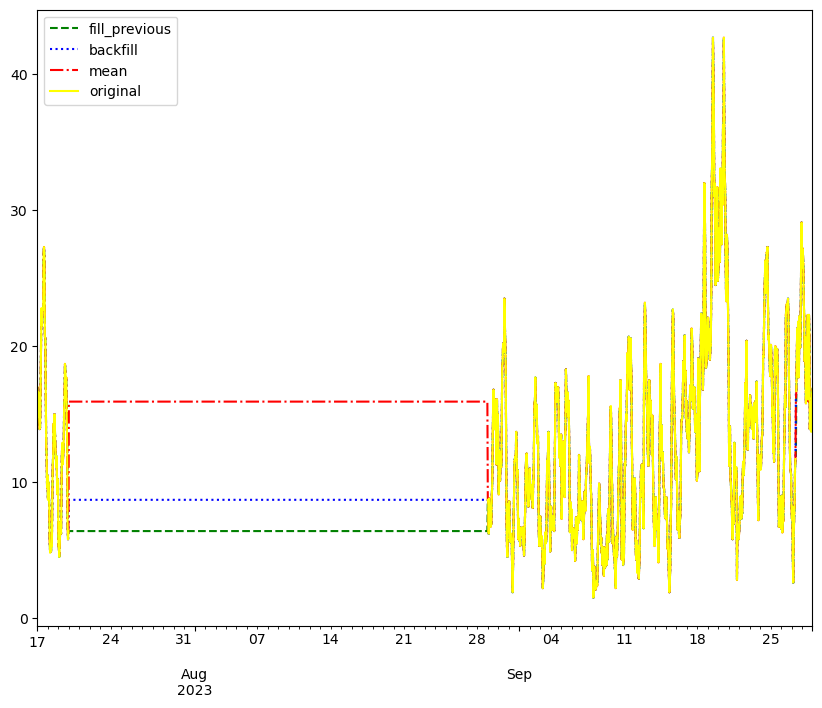

In [201]:
# try ffiiling the missing values with the previous value
missing_data["fill_previous"] = missing_data["windspeed"].fillna(method='ffill')
missing_data["backfill"] = missing_data["windspeed"].fillna(method='bfill')
missing_data["mean"] = missing_data["windspeed"].fillna(colchester_df["windspeed"].mean())
#plot
fig, ax = plt.subplots(figsize=(10,8))
missing_data["fill_previous"].plot(ax=ax,linestyle='--',color="green", label="fill_previous")
missing_data["backfill"].plot(ax=ax,linestyle=':',color="blue", label="backfill")
missing_data["mean"].plot(ax=ax,linestyle='-.',color="red", label="mean")
missing_data["windspeed"].plot(ax=ax,linestyle='-',color="yellow", label="original")
plt.legend()
plt.show()

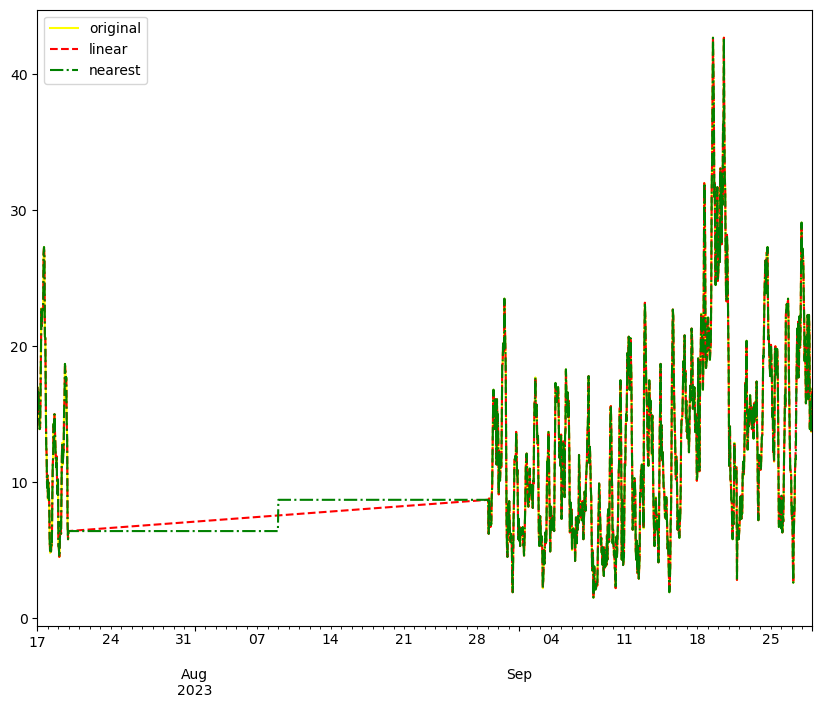

In [207]:
# lets fill missing values with interpolation, we are going to try different methods on the windspeed and plot them to see which one fits better
missing_data['linear'] = missing_data['windspeed'].interpolate(method='linear')
missing_data['nearest'] = missing_data['windspeed'].interpolate(method='nearest')
missing_data['spline'] = missing_data['windspeed'].interpolate(method='spline', order=2)
missing_data['polynomial'] = missing_data['windspeed'].interpolate(method='polynomial', order=2)

#plot
fig, ax = plt.subplots(figsize=(10,8))
missing_data['windspeed'].plot(ax=ax, color="yellow",label='original')
missing_data['linear'].plot(ax=ax,  linestyle='--', color='red',label='linear')
missing_data['nearest'].plot(ax=ax, linestyle='-.', color='green', label='nearest')
#missing_data['spline'].plot(ax=ax,linestyle=':', color='purple', label='spline')
#missing_data['polynomial'].plot(ax=ax,linestyle='--', color='black', label='polynomial') 
#we are not going to use this since is a very bad aproximation and dont let see us the perm¡formance of the oder methods

ax.legend()
plt.show()




In [204]:
# we are going to fill all the missing values with the linear interpolation
colchester_df_full = colchester_df_full.interpolate(method='linear')
colchester_df_full.head()

windspeed  temp  sealevelpressure     windpower
2000-01-01 00:00:00        9.4   5.9            1020.6  4.901388e+05
2000-01-01 01:00:00       15.1   6.4            1020.4  2.570771e+06
2000-01-01 02:00:00       13.9   6.6            1020.5  1.921775e+06
2000-01-01 03:00:00       14.1   7.2            1020.5  2.023435e+06
2000-01-01 04:00:00       14.3   7.2            1020.4  2.132902e+06

In [208]:
#lets see if we have any missing values
print("Missing values: ",colchester_df_full.isnull().sum())

Missing values:  windspeed           0
temp                0
sealevelpressure    0
windpower           0
dtype: int64


In [209]:
# lets plot the data again to see if we have any missing values
px.line(colchester_df_full.resample('D').mean().loc['2023'], title='2023 Daily average of all variables in colchester dataset')

the missing values look coherent, they have values inside the normal values of all variables, so we are going to save them

In [214]:
# create year, month and week columns
colchester_df_full['year'] = colchester_df_full.index.year
colchester_df_full['month'] = colchester_df_full.index.month
colchester_df_full['week_of_year'] = colchester_df_full.index.isocalendar().week

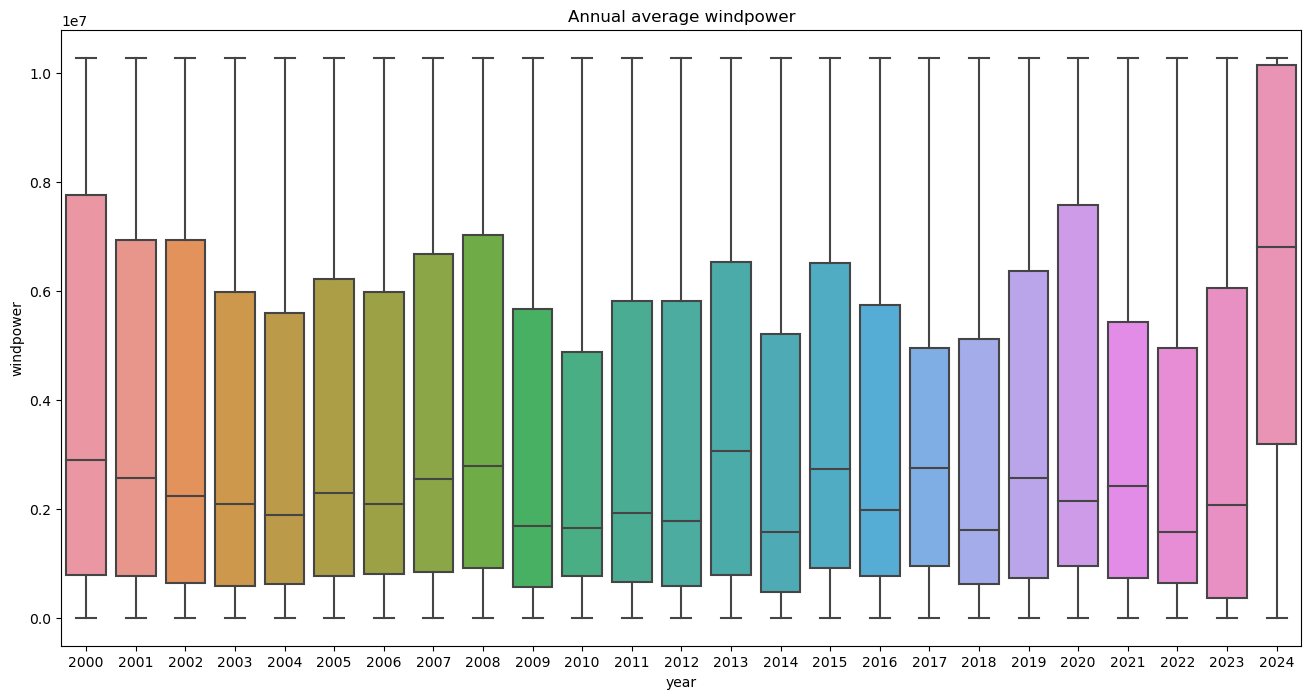

In [215]:
# plot box annually average for windpower 
plt.figure(figsize=(16, 8))
sns.boxplot(data=colchester_df_full, x='year', y='windpower')
plt.title('Annual average windpower')
plt.show()

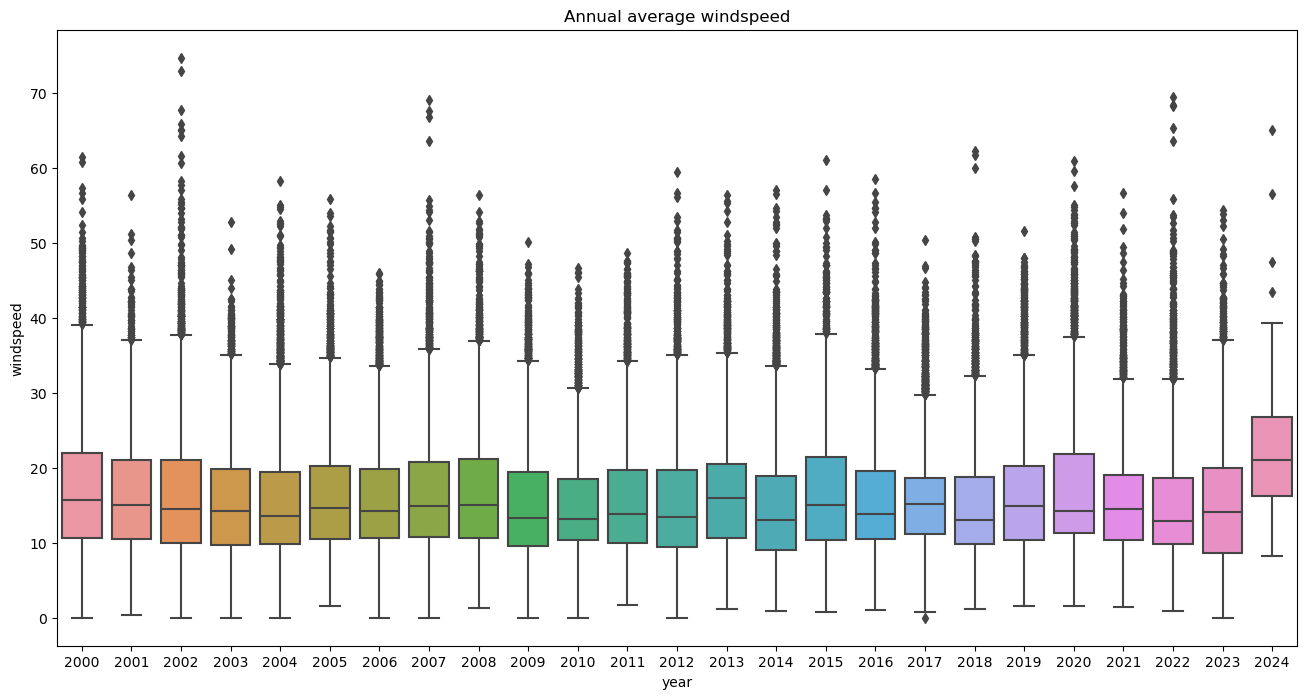

In [216]:
# plot box annually average for windspeed
plt.figure(figsize=(16, 8))
sns.boxplot(data=colchester_df_full, x='year', y='windspeed')
plt.title('Annual average windspeed')
plt.show()

we can see that 2024 is very high because we have very few days of data of this year, so it is biased, therefore is not a comparable average. We are now just to focus on windpower since it is directly related with windspeed, so the metrics are going to have the same behaviour

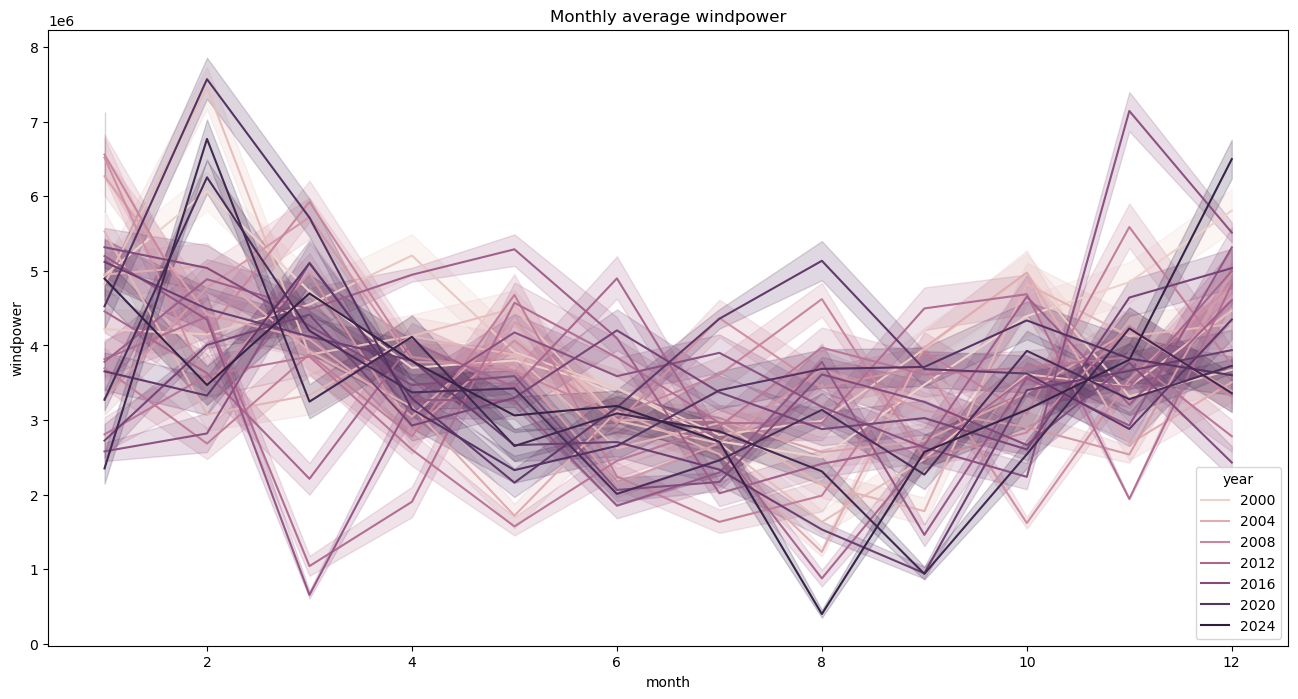

In [217]:
# visualize trends across the year for windpower
plt.figure(figsize=(16, 8))
sns.lineplot(data=colchester_df_full, x='month', y='windpower', hue='year')
plt.title('Monthly average windpower')
plt.show()

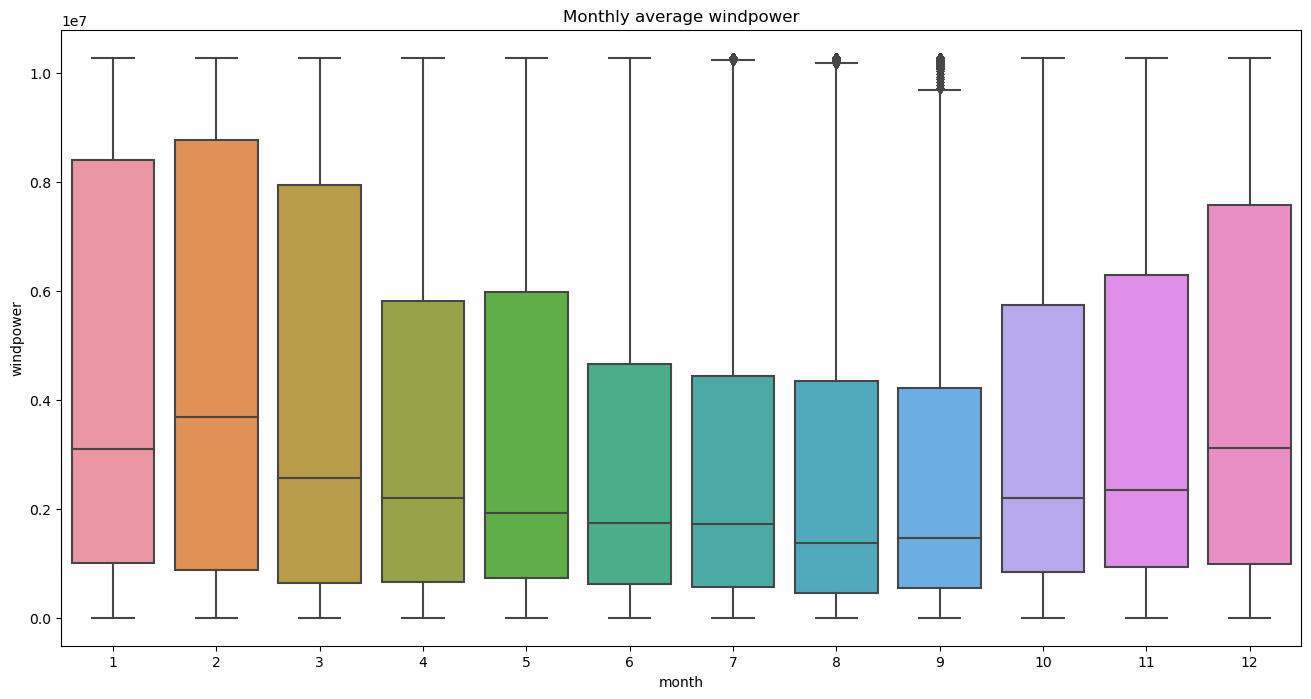

In [219]:
# visualize trends across the year for windpower using box plots
plt.figure(figsize=(16, 8))
sns.boxplot(data=colchester_df_full, x='month', y='windpower')
plt.title('Monthly average windpower')
plt.show()

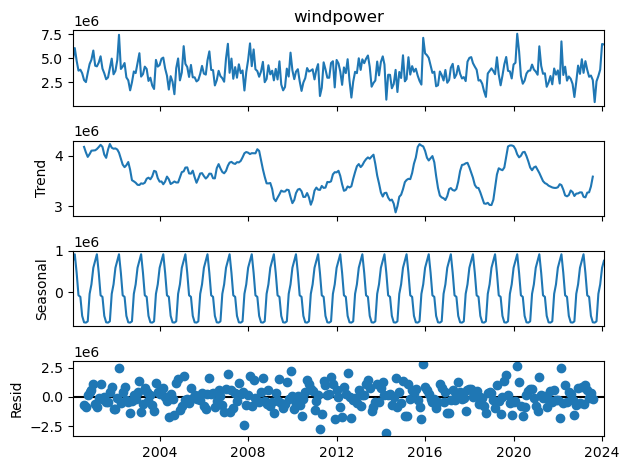

In [221]:
#lets decompose our time series to see the trend, seasonality and residuals using monthly average of windpower
decomposition = seasonal_decompose(colchester_df_full['windpower'].resample('M').mean(), model='additive')
fig = decomposition.plot()
plt.show()


there is no clear trend, in any part of the timeseries, and we have a very clear seasonality as we have discovered before, we also have too much resid.
From previous plots and this we can deduce:
* Year seasonality
* All years have had different behaviour

In [227]:
# Statistical test for stationarity: Augmented Dickey-Fuller (ADF) test
adf=adfuller(colchester_df_full['windpower'])
print("ADF test statistic: ",adf[0])
print("p-value: ",adf[1])

ADF test statistic:  -36.79956567106274
p-value:  0.0


p-value < 0.05 dont have aunit root and can be stationary. In our case we saw periodicty in the previous plots, therefore we are not going to consider the results from this test.

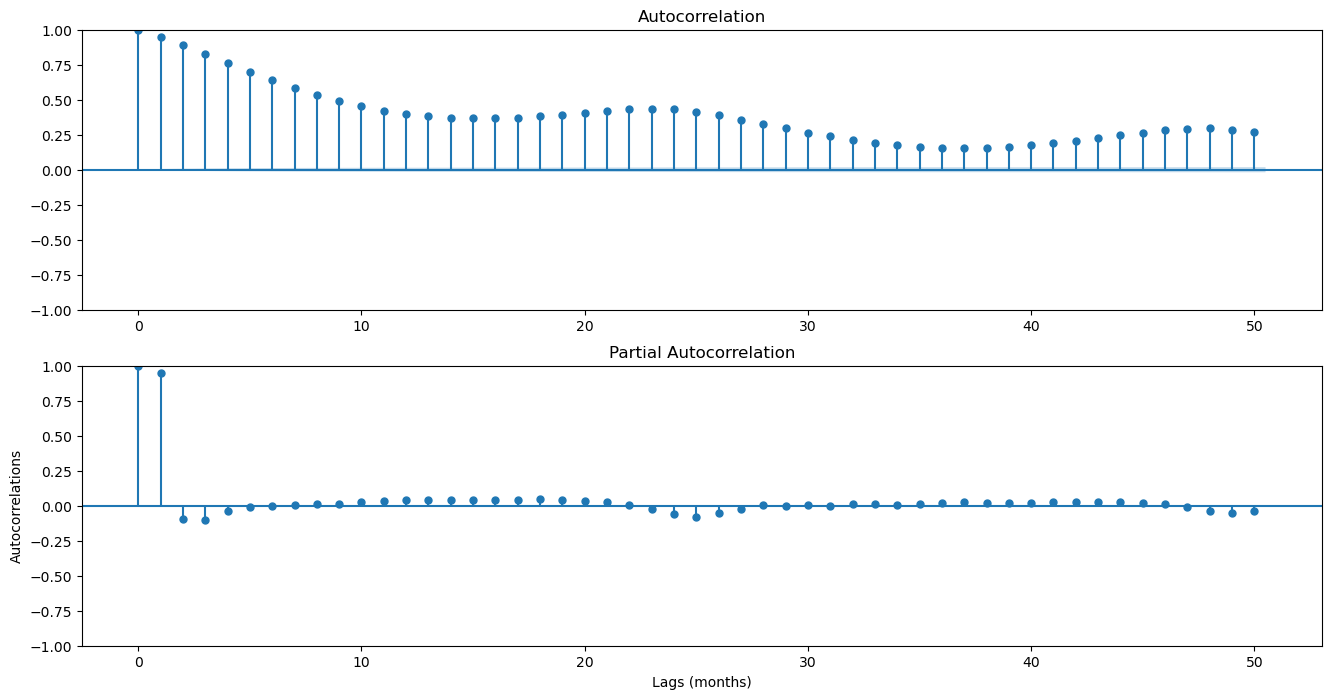

In [232]:
# we are now going to plot autocorrelation and partial autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2,1,figsize=(16,8))
plot_acf(colchester_df_full['windpower'], lags=50, ax=ax[0])
plot_pacf(colchester_df_full['windpower'], lags=50, ax=ax[1])
plt.xlabel('Lags (months)')
plt.ylabel('Autocorrelations')
plt.show()
